# Loss függvények

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
from multilayer_nn import losses as L
from matplotlib import pyplot as plt
import numpy as np

## Mean Squared Loss

A mean squared error a következőképpen van definiálva. Ha az elvárt és a prediktált kimeneteket vektorokként kezeljük, akkor egy L2 távolságot kell köztük számolni.

\begin{equation}
L_{mse} = \frac{1}{2}\sum_i{\left|\left| y^{(i)}_{exp} - y^{(i)}_{pred} \right|\right|^2_2}
\end{equation}

A loss függvény alakján nem változtat, de a fenti összefüggést sok esetben osztják a minták darabszámával. Nézzük meg a görbe alakját, ha feltesszük, hogy csak egy darab mintánk van.

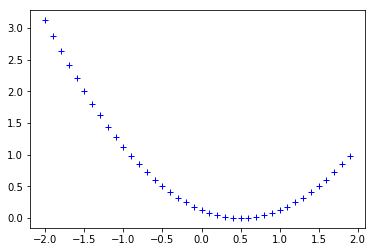

In [3]:
y_exp = 0.5
y_pred = np.array([t/10.0 for t in range(-20, 20, 1)])

L_mse = lambda y_p: L.MeanSquaredError().loss([y_p], [y_exp])
losses = list(map(L_mse, y_pred))

plt.plot(y_pred, losses, 'b+')

Látható, hogy ez egy parabola, aminek a minimuma jelen esetben az $y_{exp}$-nél van. A loss értéke növekszik, ahogy távolodunk az elvárt értéktől. Az MSE elég népszerű, mivel klasszifikciós és regressziós problémáknál is lehet használmni. Bár elsődlegesen regressziónál érdemes.

## Cross Entropy loss

A cross entropy loss definíciója:

\begin{equation}
L_{ce} = -\sum_i{\sum_j{I\left\{y^{(i)}_{exp}(j)=1\right\} \cdot \log\left( y^{(i)}_{pred}(j) \right) }},
\end{equation}

ahol $y^{(i)}_{exp}(j)$ jelenti az $i$-dik minta (vektor) $j$-dik elemét. Az elvárt kimentnek one-hot-encoded-nak kell lennie (mindenhol 0-ák vannak, 1-es pedig ott, ami az elvárt cimke). 

Ez a loss elsődlegesen klasszifikációra való. Ha az $y$ két dimenziós, akkor *binary cross entropy loss*-ról van szó, egyéb esetben pedig *cathegorical cross entropy*-ról.

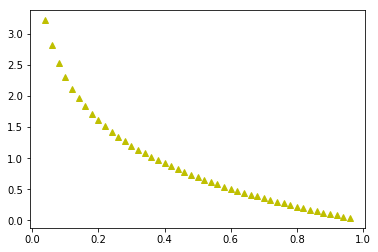

In [4]:
y_exp = np.array([0, 1])
y_pred = [np.array([1-t/100.0, t/100.0]) for t in range(4, 98, 2)]

L_ce = lambda y_p: L.CrossEntropy().loss([y_p], [y_exp])
losses = list(map(L_ce, y_pred))

plt.plot([x[1] for x in y_pred], losses, 'y^')

## Huber loss

A Huber-loss két részből áll: egy parabolából és lineáris függvényekből, amik folytonosan, törés nélkül kapcsolódnak egymáshoz.

\begin{equation}
L_{huber} = \frac{1}{2} \left( y - f(x) \right)^2,\ |y - f(x)| \leq \delta,
\end{equation}

\begin{equation}
L_{huber} = \delta | y - f(x) | - \frac{1}{2} \delta^2,\ egyébként. 
\end{equation}

A $\delta$ az a sugár, amin belül parabolát (vagy paraboloidot) használunk, ezen kívül már lineáris függvény van. A cél, hogy a nagyon különböző megoldásnál ne legyen túlságosan nagy a gradiens, mivel ez vezethet instabilitáshoz. 

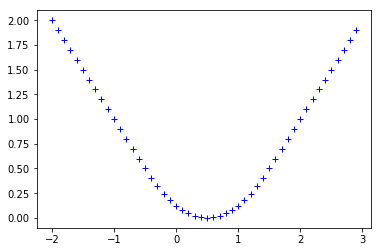

In [5]:
y_exp = 0.5
y_pred = np.array([t/10.0 for t in range(-20, 30, 1)])

L_huber = lambda y_p: L.Huber().loss([y_p], [y_exp])
losses = list(map(L_huber, y_pred))

plt.plot(y_pred, losses, 'b+')

## Kullback-Leibler divergence loss

A Kullback-Leibler divergencia egy olyan függvény, aminek a segítségével megmérhetjük a távolságot, eltérést két valószínűségi eloszlás között. Értéke 0, ha a két eloszlás azonos. Legyen $p$ és $q$ két diszkrét valószínűségi eloszlás (folytonosra is lehet értelmezni, szumma helyett integrál lesz). A formula:

\begin{equation}
KL(p|q) = \sum_j { p_j \log\frac{p_j}{q_j}}.
\end{equation}

Vegyük észre, hogy nem szimmetrikus! A Jensen-Shannon divergencia viszont igen:

\begin{equation}
JSD(p|q) = \frac{1}{2} \left( KL\left(p\left|\frac{p+q}{2}\right. \right) + KL\left(q\left|\frac{p+q}{2}\right. \right) \right)
\end{equation}

A loss függvény a teljes mintahalmazra az egyéni loss-ok összege.

\begin{equation}
L_{KL} = \sum_i{\sum_j{ y^{(i)}_j \log \frac{y^{(i)}_j}{\tilde{y}^{(i)}_j}}}.
\end{equation}

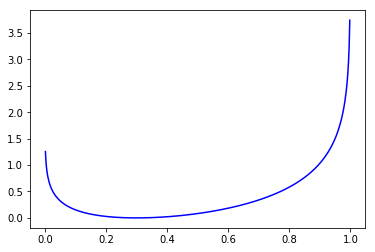

In [9]:
# Az összehasonlításhoz használjunk egy Bernoulli eloszlást.
y_target = np.array([0.3, 1 - 0.3])
x = [temp / 500. for temp in range(1, 500)]

kl_div = lambda x: L.KLdiv().loss([np.array([x, 1-x])], [y_target])
losses = list(map(kl_div, x))
plt.plot(x, losses, 'b-')

A KL divergencia mindig pozitív, amit a Jensen-egyenlőtelnségből láthatunk:

\begin{equation}
\varphi\left( E[x] \right) \leq E\left[ \varphi(x) \right],
\end{equation}

ahol $\varphi$ egy konvex függvény. Ezt kihasználva:

\begin{equation}
\log \left( \sum_i{p_i \frac{q_i}{p_i}} \right) \geq \left( \sum_i{p_i \log \frac{q_i}{p_i}} \right).
\end{equation}

Itt az egyenlőtlenség jel fordítva szerepel, mivel a logaritmus függvény konkáv. Viszont (-log konvex lenne). Ezt követően néhány művelet után:

\begin{equation}
\log \left( \sum_i q_i \right) = \log (1) = 0 \leq \left( \sum_i{p_i \log \frac{p_i}{q_i}} \right) = KL(p|q).
\end{equation}

## Slow down

Ez a példa megtalálható ebben a könyvben is: [Michael Nielsen's book](http://neuralnetworksanddeeplearning.com/). A következő kép illusztrálja, hogy mi az architektúra.

![slowdown](https://drive.google.com/uc?export=download&id=1UTOkphhIQCw0xGDorVXcdld0Hs3AzvTn)

Tehát:

* bemenet: $x = 1$
* elvárt kimenet: $y = 0$
* a súly az inicializáció után: $W = 5$
* tanulási ráta: $\alpha = 0.1$

Először az MSE-t használjuk. Ekkor a teljes összefüggés a loss-ra:

\begin{equation}
L_{mse} = \frac{1}{2}\left(0 - \sigma(W \cdot x) \right)^2
\end{equation}

ahol $\sigma$ a szigmoid függvény.

A második esetben a cross entropy loss-t fogjuk használni:

\begin{equation}
L_h = -(1 - 0) \cdot \log\left( 1 - \sigma(W \cdot x) \right).
\end{equation}

A súlyok frissítésének módja:

\begin{equation}
W_{t+1} = W_t - \alpha \cdot \left. \frac{\partial L}{\partial W}\right|_{W = W_t}
\end{equation}

ahol $L$ vagy az MSE vagy a CE loss.

Ezután a deriváltak:

\begin{equation}
\frac{\partial L_{mse}}{\partial W} = \sigma(W \cdot x)^2 \cdot \left( 1 - \sigma(W \cdot x) \right) \cdot x,
\end{equation}

\begin{equation}
\frac{\partial L_{ce}}{\partial W} = \sigma(W \cdot x) \cdot x.
\end{equation}

In [6]:
sigma = lambda x: 1.0/(1.0 + np.exp(-x))
x = 1
alpha = 0.01

# MSE
L_mse = lambda w: 0.5 * (sigma(w * x))**2
dL_mse = lambda w: (sigma(w * x))**2 * (1 - sigma(w * x)) * x

# CE
L_ce = lambda w: -np.log(1 - sigma(w * x))
dL_ce = lambda w: sigma(w* x) * x

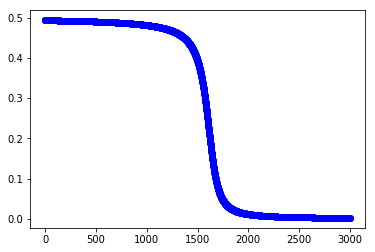

In [7]:
# MSE
x_axis = []
y_axis = []
W = 5
for i in range(3000):
    loss = L_mse(W)
    d_loss = dL_mse(W)
    
    W = W - 0.1 * d_loss
    x_axis.append(i)
    y_axis.append(loss)
plt.plot(x_axis, y_axis, 'bo')

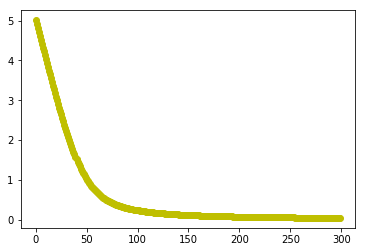

In [8]:
# CE
x_axis = []
y_axis = []
W = 5
for i in range(300):
    loss = L_ce(W)
    d_loss = dL_ce(W)
    
    W = W - 0.1 * d_loss
    x_axis.append(i)
    y_axis.append(loss)
plt.plot(x_axis, y_axis, 'yo')

Ezt a jelenséget hívják **slow down**-nak. A lényege, hogyha valamilyen szaturálódó aktivációs függvény van a kimenet előtt és a hibát MSE-vel számoljuk, akkor abban az esetben, ha az elvárt kimenet és a prediktált kimenet távol vannak egymástól, a tanulás lelassulhat.